In [40]:
from pybaseball import statcast
from pybaseball import pitching_stats_bref
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loads in the Baseball Reference and Statcast data

In [41]:
bref_df = pitching_stats_bref("2023")
bref_df = bref_df[["Name", "ERA"]]

bref_df

,Name,ERA
1,Fernando Abad,4.26
2,Andrew Abbott,3.64
3,Cory Abbott,7.48
4,Albert Abreu,4.73
5,Bryan Abreu,1.97
...,...,...
861,Danny Young,1.08
862,Rob Zastryzny,4.79
863,Angel Zerpa,6.33
864,Bruce Zimmermann,5.56


In [42]:
savant_df = statcast(start_dt = "2023-03-30", end_dt = "2023-11-15")
#pd.set_option('display.max_columns', None)

savant_df

This is a large query, it may take a moment to complete


100%|██████████| 231/231 [01:04<00:00,  3.58it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2641,SL,2023-09-12,88.4,-1.93,5.92,"Hernández, Carlos",650391,672578,force_out,hit_into_play,...,11,11,10,10,11,Standard,Standard,146,-0.096,-0.227
2690,FF,2023-09-12,100.1,-2.02,5.87,"Hernández, Carlos",650391,672578,NaN,foul,...,11,11,10,10,11,Standard,Standard,220,0.0,-0.042
2835,FF,2023-09-12,99.6,-1.85,6.14,"Hernández, Carlos",650391,672578,NaN,ball,...,11,11,10,10,11,Standard,Standard,215,0.0,0.026
2927,FF,2023-09-12,100.8,-1.82,6.15,"Hernández, Carlos",673357,672578,force_out,hit_into_play,...,11,11,10,10,11,Standard,Standard,219,-0.105,-0.417
2992,FF,2023-09-12,100.6,-1.74,6.09,"Hernández, Carlos",673357,672578,NaN,foul,...,11,11,9,9,11,Standard,Standard,216,0.0,-0.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,0,0,Standard,Standard,234,0.0,-0.083
3956,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,0,0,Standard,Strategic,229,0.0,-0.076
4197,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,0,0,Standard,Strategic,233,0.0,0.136
4317,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,0,0,Standard,Standard,237,0.0,0.064


In [43]:
# Converts the Induced Vertical Break and Horizontal Break to inches from feet
savant_df['IVB'] = savant_df['pfx_z'] * 12
savant_df['HB'] = savant_df['pfx_x'] * 12

savant_df = savant_df.rename(columns={'player_name': 'Name', 'pitch_type': 'Pitch Type'})
savant_df

,Pitch Type,game_date,release_speed,release_pos_x,release_pos_z,Name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB
2641,SL,2023-09-12,88.4,-1.93,5.92,"Hernández, Carlos",650391,672578,force_out,hit_into_play,...,10,10,11,Standard,Standard,146,-0.096,-0.227,2.64,0.48
2690,FF,2023-09-12,100.1,-2.02,5.87,"Hernández, Carlos",650391,672578,NaN,foul,...,10,10,11,Standard,Standard,220,0.0,-0.042,18.6,-8.76
2835,FF,2023-09-12,99.6,-1.85,6.14,"Hernández, Carlos",650391,672578,NaN,ball,...,10,10,11,Standard,Standard,215,0.0,0.026,15.48,-12.0
2927,FF,2023-09-12,100.8,-1.82,6.15,"Hernández, Carlos",673357,672578,force_out,hit_into_play,...,10,10,11,Standard,Standard,219,-0.105,-0.417,17.64,-11.76
2992,FF,2023-09-12,100.6,-1.74,6.09,"Hernández, Carlos",673357,672578,NaN,foul,...,9,9,11,Standard,Standard,216,0.0,-0.117,18.0,-11.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,Standard,Standard,234,0.0,-0.083,5.52,-20.28
3956,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,Standard,Strategic,229,0.0,-0.076,13.92,-15.36
4197,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,Standard,Strategic,233,0.0,0.136,14.28,-9.6
4317,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,Standard,Standard,237,0.0,0.064,4.92,-20.52


In [44]:
def flip_names(name):
    first_name, last_name = name.split(", ")
    return f"{last_name} {first_name}"

savant_df['Name'] = savant_df["Name"].apply(flip_names)

### Groups by a pitchers' name and finds all the stats used to calculate sPRA

In [53]:
player_grouped = savant_df.groupby(['Name']).agg(
    Pitches = ('Pitch Type', 'count'),
    BB = ('events', lambda x: (x == 'walk').sum()),
    HBP = ('events', lambda x: (x == 'hit_by_pitch').sum()),
    K = ('events', lambda x: (x == 'strikeout').sum()),
    GB = ('bb_type', lambda x: (x == 'ground_ball').sum()),
    LD = ('bb_type', lambda x: (x == 'line_drive').sum()),
    FB = ('bb_type', lambda x: (x == 'fly_ball').sum()),
    PU = ('bb_type', lambda x: (x == 'popup').sum()),
    PA = ('events', lambda x: (x.isin(['other_out', 'single', 'double', 'triple', 'home_run', 'walk', 'strikeout', 'field_out', 'hit_by_pitch', 'sac_fly', 'sac_fly_double_play', 'sac_bunt', 'field_error', 'fielders_choice', 'double_play', 'fielders_choice_out', 'sac_fly_double_play', 'strikeout_double_play', 'catcher_interf', 'triple_play', 'grounded_into_double_play'])).sum()))

league_average = player_grouped[player_grouped['PA'] >= 5]
player_grouped = player_grouped[player_grouped['PA'] >= 335]
player_grouped

,Pitches,BB,HBP,K,GB,LD,FB,PU,PA
Name,,,,,,,,,
Aaron Civale,1808,30,4,98,132,75,91,28,451
Aaron Nola,2806,44,1,181,201,125,134,33,710
Adam Wainwright,1692,38,1,52,148,100,106,13,444
Adrian Houser,1538,28,1,76,138,65,75,14,390
Alek Manoah,1689,56,9,79,104,65,78,21,405
...,...,...,...,...,...,...,...,...,...
Zac Gallen,2870,39,4,191,212,137,140,22,735
Zach Davies,1344,36,2,64,106,61,58,13,335
Zach Eflin,2330,22,3,163,226,92,97,34,626


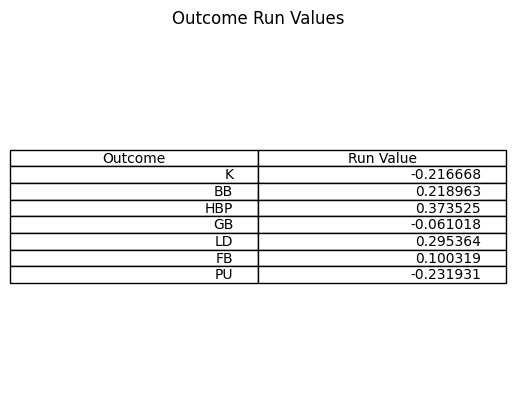

In [54]:
K = -0.216668
BB = 0.218963
HBP = 0.373525
GB = -0.061018
LD = 0.295364
FB = 0.100319
PU = -0.231931

outcomes = ["K", "BB", "HBP", "GB", "LD", "FB", "PU"]
run_values = [K, BB, HBP, GB, LD, FB, PU]

RunValues = pd.DataFrame({'Outcome': outcomes, 'Run Value': run_values})
RunValues

fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= RunValues.values, colLabels= RunValues.columns, loc='center')

ax.set_title("Outcome Run Values")

plt.savefig("Outcomes.png")
plt.show()

In [55]:
player_grouped["sPRA"] = round(
    ((0.85 * (BB * 16.38860664066341 * player_grouped["BB"]) + (HBP * 16.38860664066341 * player_grouped["HBP"]) + (K * 16.38860664066341 * player_grouped["K"]) + 
    (FB * 16.38860664066341 * player_grouped["FB"]) + (LD * 16.38860664066341 * player_grouped["LD"]) + (PU * 16.38860664066341 * player_grouped["PU"]) + (GB * 16.38860664066341 * player_grouped["GB"]))
    / player_grouped["PA"]) + 4.05, 2)
player_grouped = player_grouped.sort_values(by = "sPRA")
player_grouped = player_grouped.reset_index()
player_grouped

,Name,Pitches,BB,HBP,K,GB,LD,FB,PU,PA,sPRA
0,Tyler Glasnow,1646,30,1,142,126,54,60,11,421,3.54
1,Spencer Strider,2697,51,8,250,124,84,117,26,648,3.58
2,Freddy Peralta,2683,54,6,200,160,75,106,39,629,3.61
3,Zach Eflin,2330,22,3,163,226,92,97,34,626,3.66
4,Shohei Ohtani,2094,55,11,167,136,61,76,24,524,3.74
...,...,...,...,...,...,...,...,...,...,...,...
144,Carlos Carrasco,1587,38,6,66,140,87,66,14,406,4.68
145,Connor Seabold,1467,26,7,62,93,77,97,22,382,4.72
146,Cal Quantrill,1420,30,6,47,117,79,75,22,370,4.77
147,Noah Syndergaard,1408,19,10,56,117,86,85,18,386,4.80


In [56]:
league_average["sPRA"] = round(
    ((0.85 * (BB * 16.38860664066341 * league_average["BB"]) + (HBP * 16.38860664066341 * league_average["HBP"]) + (K * 16.38860664066341 * league_average["K"]) + 
    (FB * 16.38860664066341 * league_average["FB"]) + (LD * 16.38860664066341 * league_average["LD"]) + (PU * 16.38860664066341 * league_average["PU"]) + (GB * 16.38860664066341 * league_average["GB"]))
    / league_average["PA"]) + 4.05, 2)

### Merges the BRef and Statcast tables together to have sPRA and ERA on the same table and show the top 15 in sPRA

In [57]:
Merged = pd.merge(bref_df, player_grouped, on='Name', how='left')
Merged.loc[:, "sPRA - ERA"] = round(Merged["sPRA"] - Merged["ERA"], 2)
Merged.loc[:, "sPRA+"] =  round((np.mean(league_average["sPRA"]) / Merged["sPRA"]) * 100, 2)
top15 = Merged.sort_values(by = "sPRA", ascending = True)
top15 = top15[["Name", "sPRA", "ERA", "sPRA - ERA", "sPRA+"]].head(15)
top15

,Name,sPRA,ERA,sPRA - ERA,sPRA+
262,Tyler Glasnow,3.54,2.98,0.56,122.14
710,Spencer Strider,3.58,3.83,-0.25,120.77
567,Freddy Peralta,3.61,3.89,-0.28,119.77
201,Zach Eflin,3.66,3.47,0.19,118.13
542,Shohei Ohtani,3.74,3.14,0.60,115.61
252,Kevin Gausman,3.75,3.28,0.47,115.30
105,Edward Cabrera,3.79,4.56,-0.77,114.08
664,Kodai Senga,3.79,3.07,0.72,114.08
786,Logan Webb,3.79,3.40,0.39,114.08
376,Clayton Kershaw,3.82,2.61,1.21,113.19


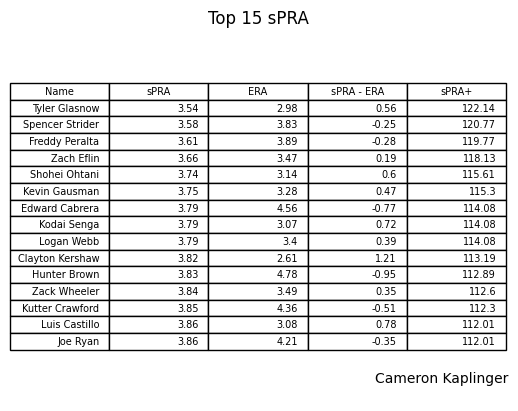

In [58]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= top15.values, colLabels= top15.columns, loc='center')

ax.set_title("Top 15 sPRA")

caption = "Cameron Kaplinger"
fig.text(0.8, 0.15, caption, ha='center', fontsize=10)

plt.savefig("Top15.png")
plt.show()

### Displays the bottom 15 in sPRA

In [59]:
bottom15 = Merged.sort_values(by = "sPRA", ascending = False)
bottom15 = bottom15[["Name", "sPRA", "ERA", "sPRA - ERA", "sPRA+"]].head(15)
bottom15

,Name,sPRA,ERA,sPRA - ERA,sPRA+
771,Adam Wainwright,4.95,8.19,-3.24,87.35
723,Noah Syndergaard,4.80,6.50,-1.70,90.08
594,Cal Quantrill,4.77,5.70,-0.93,90.64
661,Connor Seabold,4.72,7.65,-2.93,91.60
113,Carlos Carrasco,4.68,6.80,-2.12,92.39
494,Miles Mikolas,4.64,4.63,0.01,93.18
231,Kyle Freeland,4.64,5.09,-0.45,93.18
25,Tyler Anderson,4.63,5.36,-0.73,93.39
784,Luke Weaver,4.61,6.77,-2.16,93.79
129,Yonny Chirinos,4.61,5.40,-0.79,93.79


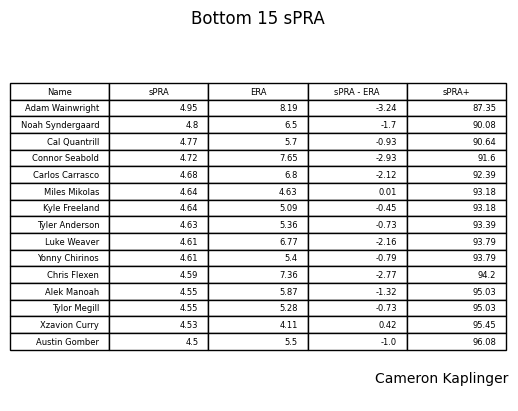

In [60]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= bottom15.values, colLabels= bottom15.columns, loc='center')

ax.set_title("Bottom 15 sPRA")

caption = "Cameron Kaplinger"
fig.text(0.8, 0.15, caption, ha='center', fontsize=10)

plt.savefig("Bottom15.png")
plt.show()